
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Sistemas de Recomendación

## Objetivos del Laboratorio

1.	Implementar y comparar diferentes tipos de sistemas de recomendación utilizando datos reales.

2.	Explorar el impacto de las características de los datos en la calidad de las recomendaciones.

3.	Desarrollar habilidades en preprocesamiento, modelado y evaluación de sistemas de recomendación.


## Los problemas

A lo largo de este laboratorio deberás enfrentarte a distintos casos prácticos:

- **Caso 1: Sistema de Recomendación Basado en Contenido**

	Debes construir un sistema que recomiende videojuegos similares basándose en su descripción y géneros. Para eso deberás:

	- Preprocesar las descripciones de los juegos (texto) utilizando técnicas de NLP aprendidas durante la clase.

	- Extraer y limpiar las etiquetas de género para su uso en el sistema de recomendación.

	- Implementar una métrica de similitud (como el coseno) para recomendar juegos similares.

	- Evaluar las recomendaciones generadas para un conjunto de juegos específicos.

- **Caso 2: Sistema de Recomendación Basado en Popularidad**

	Debes un sistema que recomiende los juegos más populares según su calificación general y número de reseñas. Para eso deberás:
	
	- Limpiar y convertir las columnas relacionadas con las calificaciones y las reseñas en datos numéricos.
	
	- Identificar los juegos más populares utilizando métricas como la mediana de calificaciones ponderadas.
	
	- Crear una tabla de recomendaciones generales para diferentes géneros.

## Los Datos


- **1. games_description.csv**: Este archivo contiene información detallada sobre videojuegos disponibles en una tienda. Las columnas que tenemos son: 


	- **`name`**: Nombre del videojuego.

	- **`short_description`**: Breve descripción del videojuego.

	- **`long_description`**: Descripción completa y detallada del videojuego.

	- **`genres`**: Lista de géneros asociados al videojuego (por ejemplo, Acción, RPG).

	- **`minimum_system_requirement`**: Requisitos mínimos para ejecutar el videojuego.

	- **`recommend_system_requirement`**: Requisitos recomendados para ejecutar el videojuego.

	- **`release_date`**: Fecha de lanzamiento del videojuego.

	- **`developer`**: Nombre del desarrollador del videojuego.

	- **`publisher`**: Nombre del publicador del videojuego.

	- **`overall_player_rating`**: Calificación general de los jugadores (categórica).

	- **`number_of_reviews_from_purchased_people`**: Número de reseñas realizadas por personas que compraron el juego.

	- **`number_of_english_reviews`**: Número de reseñas en inglés.

	- **`link`**: Enlace al videojuego en la tienda.


- **2. games_ranking.csv**: Este archivo contiene información sobre el ranking de videojuegos basados en diferentes métricas. Las columnsa que tenemos son:


	- **`game_name`**: Nombre del videojuego.

	- **`genre`**: Género principal del videojuego.

	- **`rank_type`**: Tipo de ranking (por ejemplo, ventas, popularidad).

	- **`rank`**: Posición del videojuego en el ranking correspondiente.

----

- Los datos del archivo `games_description.csv` pueden utilizarse para construir sistemas de recomendación basados en contenido.
- Los datos del archivo `games_ranking.csv` son ideales para implementar sistemas basados en popularidad.


In [236]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns
import matplotlib.pyplot as plt

from src.support_rec import *

import warnings
warnings.filterwarnings("ignore")

In [237]:
df_desc = pd.read_csv("datos/games_description.csv")
df_rank = pd.read_csv("datos/games_ranking.csv")

## Sistemas de recomendación basadas en contenido:

In [238]:
df_desc.head()

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


Primero vamos a necesitar elegir qué columnas nos va a aportar información contextual para decidir las recomendaciones que se realizarán a los usuarios:

- name: No aporta información relevante a la hora de recomendar, dos juegos con nombres similares no indica similitudes en los juegos.
- short_description: Sí aporta información sobre el contexto del juego y la temática.
- long_description: Puede tener relevancia, pero al ser más larga puede introducir sesgos. Además, teniendo short_description la omitiremos.
- genres: Aporta información clave sobre las similitudes entre juegos.
- Ambos system_requirements: No son relevantes en cuanto a contenido de los juegos.
- release_date: No es una métrica que indiquen similitud.
- developer y publisher: podría aportar información si los creadores de los juegos crean juegos similares, pero no es una métrica fiable.
- overall_player_rating: al tratar con countvectorizer, las palabras son individuales y las opiniones de los juegos no se mantendrían.
- number_of_reviews_from_purchased_people: número, no usable en una bolsa de palabras.
- number_of_english_reviews: lo mismo que la anterior.
- link: no relevante, independientes por juego.

Por lo que trataremos con short_description y genres.

In [239]:
df_desc["genres"] = df_desc["genres"].apply(lambda x: " ".join(eval(x)))
df_desc["short_description"] = df_desc["short_description"].fillna("")

Vamos a comprobar la cantidad de palabras que encontramos en cada uno de las columnas, para ver el peso que aportarán en nuestras recomendaciones.

In [240]:
df_desc["genres"].apply(lambda x : len(x.split())).describe()

count    290.000000
mean      24.313793
std        4.828708
min        3.000000
25%       23.000000
50%       25.000000
75%       27.000000
max       32.000000
Name: genres, dtype: float64

In [241]:
df_desc["short_description"].apply(lambda x : len(x.split())).describe()

count    290.000000
mean      34.089655
std       12.883786
min        0.000000
25%       27.250000
50%       36.000000
75%       43.750000
max       60.000000
Name: short_description, dtype: float64

Vemos que son similares, con un desbalance hacia las descripciones, pero es muy ligero. Podemos proceder sin ajustar los pesos:

In [242]:
df_desc["bag_of_words"] = df_desc["genres"] + df_desc["short_description"]

In [243]:
vectorizer = CountVectorizer(stop_words="english")
rec_vector = vectorizer.fit_transform(df_desc["bag_of_words"]).toarray()

In [244]:
content_similarity_matrix = cosine_similarity(rec_vector)

In [245]:
df_csm = pd.DataFrame(content_similarity_matrix, index = df_desc["name"], columns=df_desc["name"])

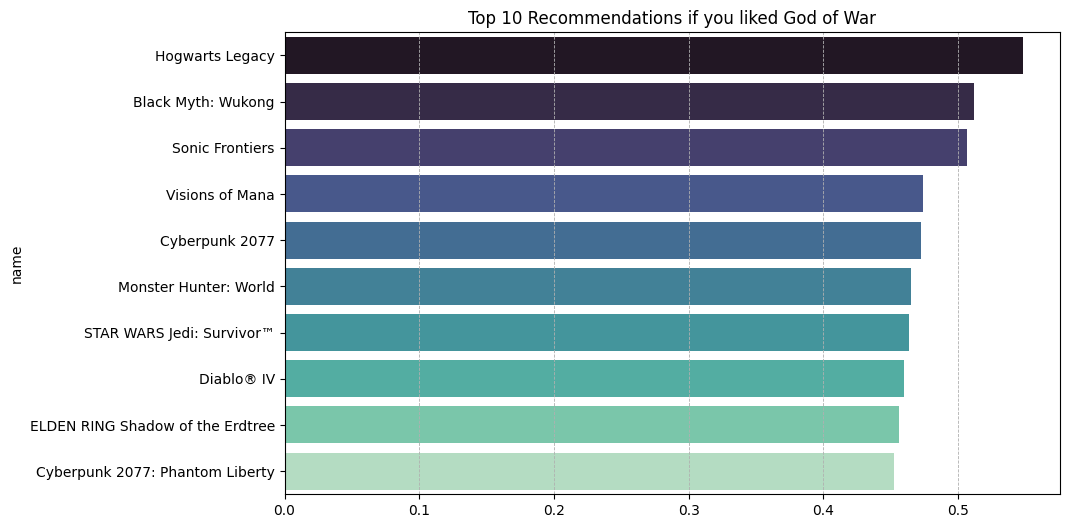

In [246]:
liked_title = "God of War"
rec_titles = get_recs_content(df_similarity = df_csm, title = liked_title, n_recs=10)

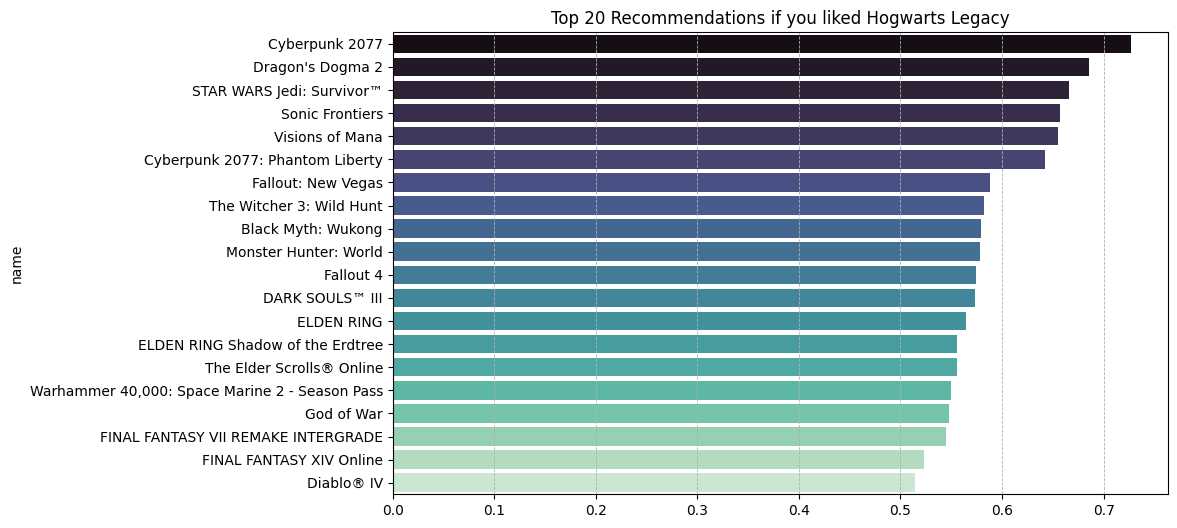

In [247]:
liked_title2 = "Hogwarts Legacy"
rec_titles2 = get_recs_content(df_similarity = df_csm, title = liked_title2, n_recs=20)

## Sistema de recomendación basado en popularidad

Vamos a obtener la información de la cantidad de reviews del dataframe de descripciones.

In [248]:
rank_uniques = df_rank["game_name"].unique()
desc_uniques = df_desc["name"].unique()

Comprobemos si todos los títulos están en el dataframe de rank.

In [ ]:
bool_list = []
for e in desc_uniques:
    bool_list.append(e in rank_uniques)

In [261]:
all(bool_list)

True

Sí contiene todos.

Limpiamos los datos y formateamos correctamente.

In [250]:
df_desc["number_of_english_reviews"] = df_desc["number_of_english_reviews"].str.replace(",","").astype(int)

Pasamos el rating a números para poder ordenar luego por esta.

In [ ]:
sentiment_to_numeric = {
    'Overwhelmingly Positive': 10,
    'Very Positive': 8,
    'Mostly Positive': 6,
    'Positive': 5,
    'Mixed': 4,
    'Mostly Negative': 3,
    'Very Negative': 1,
    '7 user reviews': None,
    '1 user reviews': None,
    '6 user reviews': None,
    '4 user reviews': None
}


In [252]:
df_desc["overall_player_rating"] = df_desc["overall_player_rating"].map(sentiment_to_numeric)

Mergeamos por los nombres.

In [253]:
df_merged = df_rank.merge(right = df_desc, left_on = "game_name", right_on="name")

Y nos quedamos con las que nos interesan.

In [255]:
df_rank_rev = df_merged[list(df_rank.columns) + ["number_of_english_reviews", "overall_player_rating"]]

Agrupamos por los juegos y sus géneros y calculamos la mediana de las métricas.

In [257]:
df_rank_grouped = df_rank_rev.groupby(["genre", "game_name"])[["number_of_english_reviews", "overall_player_rating"]].median().reset_index()

In [260]:
df_rank_grouped.head()

,genre,game_name,number_of_english_reviews,overall_player_rating
0,Action,ARK: Survival Evolved,310038.0,8.0
1,Action,Among Us,406705.0,8.0
2,Action,Apex Legends™,406269.0,4.0
3,Action,Battlefield™ V,34879.0,6.0
4,Action,Black Desert,46936.0,6.0


Llamamos a la función que nos dará recomendaciones por el género seleccionado y la prioridad que tengamos (número de reviews o la puntuación general del público).

In [259]:
get_recs_genre("Action", df_rank_grouped, priority="n_reviews")

,genre,game_name,number_of_english_reviews,overall_player_rating
1,Action,Among Us,406705.0,8.0
2,Action,Apex Legends™,406269.0,4.0
0,Action,ARK: Survival Evolved,310038.0,8.0
7,Action,Call of Duty®,299267.0,4.0
6,Action,Borderlands 2,159122.0,10.0
9,Action,Call of Duty®: Black Ops III,145713.0,8.0
5,Action,Black Myth: Wukong,51931.0,10.0
4,Action,Black Desert,46936.0,6.0
3,Action,Battlefield™ V,34879.0,6.0
8,Action,Call of Duty®: Black Ops II,21097.0,8.0
